In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

<h1> The Global Thresholding Algorithm </h1>

In [18]:
def global_threshold(image, deltaT = 0):
    
    #calculate the average intensity of the image as starting Threshold
    T = int(np.mean(image))
    Tnew = None
    #for storing history
    cache = [abs(T)]

    #loop till T - Tnew > deltaT
    while not Tnew or abs(T - Tnew) > deltaT :
        
        if Tnew is not None:
            T = Tnew
        #some parameters we will need
        m1 = 0    
        m2 = 0
        total1 = 0
        total2 = 0
        
        #threshold
        for pixel in image.reshape(-1):
            
            if pixel > T:
                #incorporate sum in m1
                m1 += pixel
                total1 += 1
                continue
                
            m2 += pixel
            total2 += 1
        
        m1 /= total1
        m2 /= total2
        
        Tnew = int((m1 + m2) / 2)
        
        cache.append(int(Tnew))
        
    
    #threshold based on the final T value
    new_img = []
    
    for pixel in image.reshape(-1):
        
        if pixel > Tnew:
            new_img.append(255)
            continue
            
        new_img.append(0)
        
    
    new_img = np.array(new_img, dtype = np.uint8).reshape(image.shape)
    
    return (new_img, Tnew, cache)
            
                
        
    
    

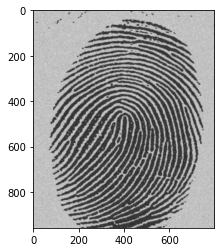

In [19]:
image = cv2.cvtColor(cv2.imread('../images/fingerprint.tif'), cv2.COLOR_BGR2GRAY)

plt.imshow(image, cmap = 'gray', vmin = 0 , vmax = 255)

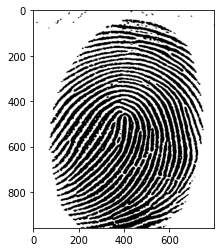

In [20]:
thresh, T, cache  = global_threshold(image)

plt.imshow(thresh, cmap = 'gray', vmin = 0, vmax = 255)

In [21]:
print(T, cache)

125 [139, 125, 125]


<h2> References </h2>

[1] Gonzalez, R. C., & Woods, R. E. (2002). Digital image processing.<br>
[2] Bradski, G. (2000). The OpenCV Library. Dr. Dobb&#x27;s Journal of Software Tools.

 